# Анализ рынка заведений общественного питания Москвы

Цель данного проекта оценить рынок заведений общественного питания в Москве. Данный анализ выполнен с целью изучения перспективности открытия в Москве оригинального кафе, где гостей будут обслуживать роботы. 

Основная цель проекта - дать ответ на вопрос сможет ли оригинальное кафе снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Анализ проводится на основе открытыx данныx о заведениях общественного питания в Москве.

### Шаг №1. Загрузка данных и подготовка их к анализу

Загрузка библиотек:

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from plotly import graph_objects as go
from numpy import median

In [2]:
# Загрузска данных
path = 'input/'   # путь к файлу
data = pd.read_csv(path + 'prj_09_rest_data.csv')

In [3]:
data.head(5)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


###### Описание данных
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

In [4]:
# получение общей информации о данных в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В таблице 15366 строк и 6 колонок. Во всех колонках одинаковое количество данных, следовательно, пропусков данных нет. В двух колонках данные имеют целочисленный тип данных (идентификатор объекта и количество посадочных мест). В остальны колонках представленны данные в текством формате (тип object). 

Проверим на наличие дубликатов в данных:

In [5]:
# проверка на отсутствие дубликатов
print(f'Количество дубликатов: {data.duplicated().sum()}')

Количество дубликатов: 0


Посмотрим какие уникальные значения присутствуют в колонке "chain":

In [6]:
data.chain.unique()

array(['нет', 'да'], dtype=object)

Аномальных значений в колонке "chain" нет.

Посмотрим на список уникальных типов объектов общественного питания:

In [7]:
list(data.object_type.unique())

['кафе',
 'столовая',
 'закусочная',
 'предприятие быстрого обслуживания',
 'ресторан',
 'кафетерий',
 'буфет',
 'бар',
 'магазин (отдел кулинарии)']

Посмотрим на уникальные названия заведений, которые относятся к сетевым заведениям:

In [8]:
data.query('chain=="да"').object_name.unique()

array(['ПИЦЦЕТОРИЯ', 'Брусника', 'Алло Пицца', 'Суши Wok', 'Тануки',
       "Домино'с Пицца", 'Готика', 'Му-Му', 'Хлеб насущный', 'TAJJ MAHAL',
       'ДАНКИН ДОНАТС', 'Вареничная №1', 'ШОКОЛАДНИЦА', 'Теремок',
       'Хинкальная', 'Шантимель', 'ТАНУКИ', 'Шоколадница', 'МУ-МУ',
       'Хинкальная City', 'КРУЖКА', 'СУШИ ВОК', 'ПРИМАВЕРА', 'Виктория',
       'Пиццерия «АКАДЕМИЯ»', 'Чебуречная СССР', 'МАКДОНАЛДС',
       'Grand Cru', 'Чайхона №1', 'Панчо Пицца', 'KFC', 'Сабвей',
       'ресторан «Якитория»', 'Советские времена', 'Кафе «Андерсон»',
       'Кафе «Subway»', 'Ресторан «Макдоналдс»', 'Суши Сет', 'Суши WoK',
       'Шоколад', 'Тирольские пироги', 'Гамбринус', 'Пицца Фабрика',
       'Subway', 'Кафе «Якитория»', 'Кафе «Тануки»', 'Сити Пицца',
       'Кружка', 'Кофе Хаус',
       'Кулинарная Лавка Братьев Караваевых Братья Караваевы', 'Суши Вок',
       'Прайм', 'Пицца Экспресс', 'Шоколадница Кофе Хаус', 'Николай',
       'Якитория', 'МАГНОЛИЯ', 'КОФЕ С СОБОЙ', 'Джаганнат', 'Волк

В названиях присутствуют неявные дубликаты. Не будем от них избавляться, т.к они не влияют на анализ

Изучим данные в колонке address. Проверим структуру данных и создадим отдельную колонку с названием улицы.

In [9]:
# Вывод строк, в адресе которых нет идентификатора "город Москва"
data[~data['address'].str.contains('город Москва,')] 

,id,object_name,chain,object_type,address,number
859,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"Партизанская улица, дом 30",100
860,23604,Буфет - ГБОУ 60,нет,буфет,"Партизанская улица, дом 30",100
1491,25349,Ресторан «Гранатовый сад»,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40
7691,132359,Кафе «La Carotte»,нет,кафе,"1-й Нагатинский проезд, дом 10",198
7827,28214,Роснефть (закрытое),нет,столовая,"Софийская набережная, дом 26/1, строение 1",80
...,...,...,...,...,...,...
13185,192918,Limassol,нет,кафе,"Бауманская улица, дом 7, строение 3",42
13399,204788,Крошка Картошка,да,предприятие быстрого обслуживания,"Солянский тупик, дом 1/4, строение 1",15
13991,204917,Шаурма на углях- Чайхана Баракат,нет,кафе,"Таганская площадь, дом 88, строение 4",80
14003,211986,FRESH CAFE,нет,кафе,"Шарикоподшипниковская улица, дом 5, строение 1",42


Добавим название города в адреса, где он не указан:

In [10]:
# Функция для добавления названия города в адрес
def address_correct(address):
    if 'город Москва,' not in address:
        address = 'город Москва, ' + address
    return address

In [11]:
# добавление города в адрес в таблице
data['address'] = data['address'].apply(address_correct)

In [12]:
# Проверка, что строк без указания города не осталось
data[~data['address'].str.contains('город Москва,')] 

,id,object_name,chain,object_type,address,number


Добавим колонку с названием населенного пункта

In [13]:
# Функция для добавления названия населенного пункта
def city_id(name_i):
    city_name = 'город Москва'
    city_id = ['город ', 'поселение']
    address_i = name_i.split(',')[1]
    for i in city_id:
        if i in address_i:
            city_name = address_i.strip()      
    return city_name

In [14]:
# Добавление колонки с названием населенного пункта
data['city'] = data['address'].apply(city_id)

In [15]:
data.head(3)

,id,object_name,chain,object_type,address,number,city
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,город Москва
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,город Москва
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,город Москва


Посмотрим название уникальных населенных пунктов

In [16]:
data.city.unique()

array(['город Москва', 'город Зеленоград', 'поселение Вороновское',
       'поселение Внуковское', 'поселение Новофедоровское',
       'поселение Марушкинское', 'поселение Десеновское', 'город Троицк',
       'город Щербинка', 'поселение Московский', 'поселение Щаповское',
       'поселение Краснопахорское', 'поселение Воскресенское',
       'город Московский', 'поселение Сосенское', 'поселение Роговское',
       'поселение Филимонковское', 'поселение Кленовское',
       'поселение Кокошкино', 'поселение Рязановское',
       'поселение Михайлово-Ярцевское', 'поселение "Мосрентген"',
       'поселение Киевский', 'поселение Первомайское'], dtype=object)

Добавим в таблицу колонку с названием улицы:

In [17]:
# Функция определения названия улицы
def street_id(address_i, city_i):
    if city_i == 'город Москва':
        street_i = address_i.split(',')[1].strip() 
    else:
        street_i = address_i.split(',')[2].strip()       
    return street_i

In [18]:
# добавление названия улицы в таблицу
data['street'] = data.apply(lambda x: street_id(x['address'], x['city']), axis=1)

In [19]:
# Посмотрим таблицу после изменения
data.head(3)

,id,object_name,chain,object_type,address,number,city,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,город Москва,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,город Москва,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,город Москва,Абельмановская улица


In [20]:
# Описание таблицы после изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
 6   city         15366 non-null  object
 7   street       15366 non-null  object
dtypes: int64(2), object(6)
memory usage: 960.5+ KB


Посчитаем количество уникальных названий улиц в населенных пунктах:

In [21]:
data.pivot_table(index='city', values='street', aggfunc=pd.Series.nunique).sort_values(by = 'street', ascending = False)

,street
city,
город Москва,1831
город Зеленоград,136
город Троицк,19
поселение Сосенское,14
город Щербинка,13
поселение Внуковское,12
поселение Десеновское,10
поселение Московский,9
поселение Щаповское,8


Самое большое количество улиц с данными об объектах общественного питания в Москве - 1831. 

Изучим данные в колонке "number":

In [22]:
data.number.describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Изучим строки с максимальным количеством посадочных мест:

In [23]:
# объект с максимальным количеством посадочных мест
data.query('number == number.max()')

,id,object_name,chain,object_type,address,number,city,street
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700,город Москва,Кутузовский проспект


Объект с максимальным количеством посадочных мест является крупным клубом. Таким образом, количество посадочных равное 1700 не является аномальным. 

Исключим дубликаты в таблице:

In [24]:
data = data.drop_duplicates(
  subset = ['object_name', 'chain','object_type','address','number','city','street'],
  keep = 'last').reset_index(drop = True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15284 entries, 0 to 15283
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15284 non-null  int64 
 1   object_name  15284 non-null  object
 2   chain        15284 non-null  object
 3   object_type  15284 non-null  object
 4   address      15284 non-null  object
 5   number       15284 non-null  int64 
 6   city         15284 non-null  object
 7   street       15284 non-null  object
dtypes: int64(2), object(6)
memory usage: 955.4+ KB


Выводы: в таблице имеется 15284 записи о заведениях общественного питания в Москве. В 5 колонках присутствует описание заведения : название, относится ли заведение к сети заведений, тип заведения, адрес, количество посадочных мест. Пропусков в данных нет, дубликаты были исключены. Неявные дубликаты присутствуют в названии завдений, однако, это не повлияет на проводимый анализ

Загрузим дополнительную таблицу с данными принадлежности улиц к округам Москвы

In [28]:
from io import BytesIO
import requests
spreadsheet_id = '18CPdt8AnB0CtuvJQPeSEQ92xsSok5u66PCaCqqKrlPM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_ms = pd.read_csv(BytesIO(r.content))
df_ms.head(3)

,streetname,areaid,okrug,area
0,Выставочный переулок,17.0,ЦАО,Пресненский район
1,улица Гашека,17.0,ЦАО,Пресненский район
2,Большая Никитская улица,17.0,ЦАО,Пресненский район


In [29]:
# уникальные названия округов Москвы
df_ms.okrug.unique()

array(['ЦАО', 'ВАО', 'ЗАО', 'Зеленоград', 'САО', 'СВАО', 'СЗАО', 'ЮАО',
       'ЮВАО', 'ЮЗАО', 'НАО', nan, 'ТАО'], dtype=object)

### Шаг №2. Анализ данных

#### Исследование соотношения видов объектов общественного питания по количеству объектов

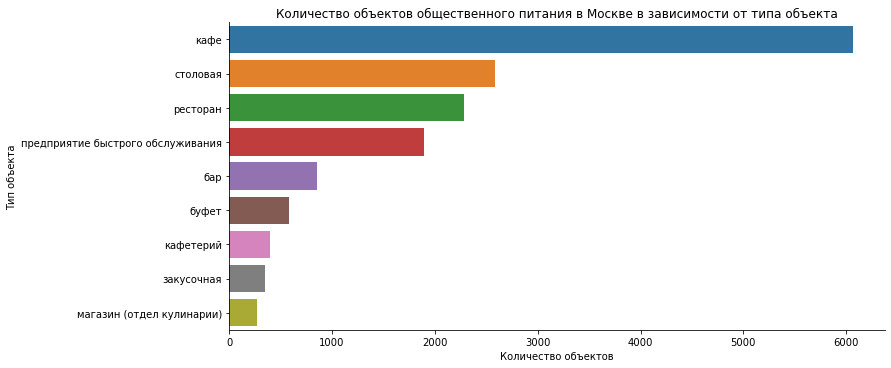

In [30]:
# Построекние столбчатой диаграммы
sns.catplot(y="object_type", kind="count", height=5, aspect=2.5, data=data,
            palette="tab10",order=data.object_type.value_counts().index).set(title='Количество объектов общественного питания в Москве в зависимости от типа объекта')
plt.xlabel('Количество объектов')
plt.ylabel('Тип объекта');

Создадим дополнительно сводную таблицу с количеством объектов по категориям объектов:

In [31]:
nb_obj = data.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by = 'id', ascending = False)
nb_obj.reset_index(drop=False, inplace=True)
nb_obj

,object_type,id
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1898
4,бар,855
5,буфет,577
6,кафетерий,395
7,закусочная,349
8,магазин (отдел кулинарии),273


Большинство объектов представленных в таблице относятся к категории "кафе" - более 6000 объктов. На втором месте по многочисленности объектов - объекты категории "столовая" (около 2600 объектов). 
Чуть более 2000 объектов относится к категории "ресторан" и чуть менее 2000 объектов относится к категории "предприятие быстрого обслуживания". Количество объктов остальных категорий - не привышает 1000 объектов.
Самая малочисленная категория - "магазин (отдел кулинарии)" - 273 объекта.

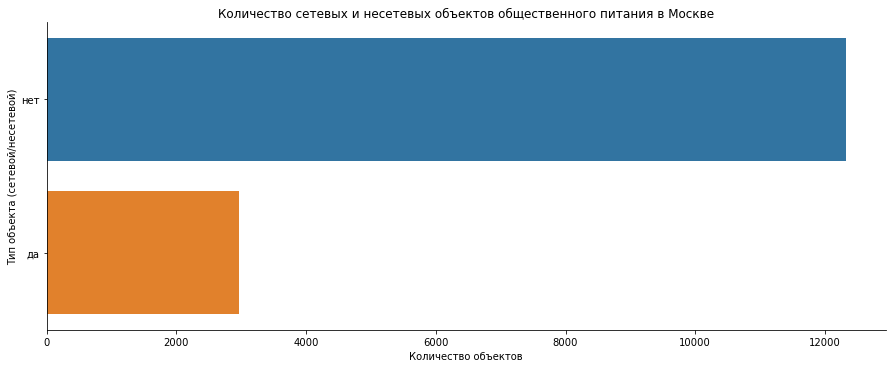

In [32]:
# Построекние столбчатой диаграммы
sns.catplot(y="chain", kind="count", height=5, aspect=2.5, data=data,
            palette="tab10",order=data.chain.value_counts().index).set(title='Количество сетевых и несетевых объектов общественного питания в Москве')
plt.xlabel('Количество объектов')
plt.ylabel('Тип объекта (сетевой/несетевой)');

Вывод: несетевых завдений значительно больше, чем сетевых

#### Исследование соотношения сетевых и несетевых заведений по количеству

Построим график с количеством объктов в зависимости от типа объекта и принадлежности к сети:

In [33]:
palette ={"да": "C1", "нет": "C0"}

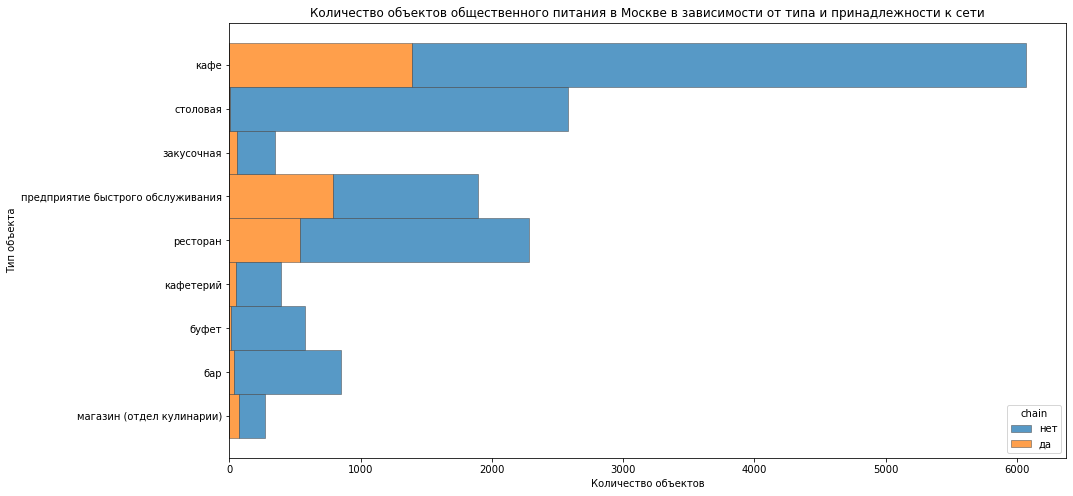

In [34]:
plt.figure(figsize=(15,8))
sns.histplot(
    data,
    y="object_type", hue="chain",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    palette=palette
)
plt.title('Количество объектов общественного питания в Москве в зависимости от типа и принадлежности к сети')
plt.xlabel('Количество объектов')
plt.ylabel('Тип объекта');

Создадим дополнительно сводную таблицу с количеством объектов по категориям объектов и принадлежности к сети и определим соотношение сетевых объктов к несетевым:

In [35]:
pt_kind_ch = data.pivot_table(index='object_type', values='id', columns= 'chain',aggfunc='count')
pt_kind_ch.reset_index(drop=False, inplace=True)
pt_kind_ch['ratio']= pt_kind_ch['да']*100/(pt_kind_ch['да'] + pt_kind_ch['нет'])
pt_kind_ch = pt_kind_ch.sort_values(by='ratio', ascending = False)
pt_kind_ch

chain,object_type,да,нет,ratio
6,предприятие быстрого обслуживания,788,1110,41.517387
5,магазин (отдел кулинарии),78,195,28.571429
7,ресторан,543,1739,23.794917
3,кафе,1396,4675,22.994564
2,закусочная,56,293,16.045845
4,кафетерий,52,343,13.164557
0,бар,37,818,4.327485
1,буфет,11,566,1.906412
8,столовая,3,2581,0.116099


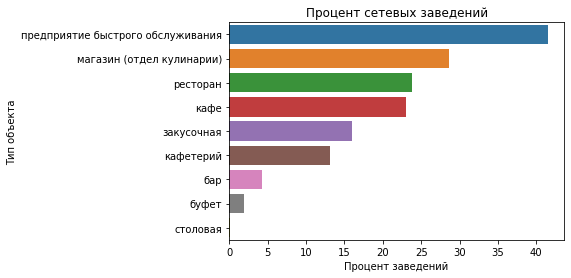

In [36]:
# Построим график
sns.barplot(x = 'ratio',
            y = 'object_type',
            data = pt_kind_ch)
plt.title('Процент сетевых заведений')
plt.xlabel('Процент заведений')
plt.ylabel('Тип объекта');

Самое высокое соотношение сетевых объектов к несетевым в категории "предприятие быстрого обслуживания" - 41% объектов относится к сетевым объектам. В категориях "кафе" и "ресторан" примерно одинаковое соотношение сетевых объектов к несетевым - 23% и 24% соответственно. Меньше всего сетевых объектов в категории "столовая". 

#### Исследование соотношения типа объекта общественного питания и среднего количества посадочных мест

Определем среднее количество посадочных мест для каждого вида объекта общественного питания. Изучим как распределено количество посадочных мест в зависимости от типа объекта. Для этого построим "ящик с усами".

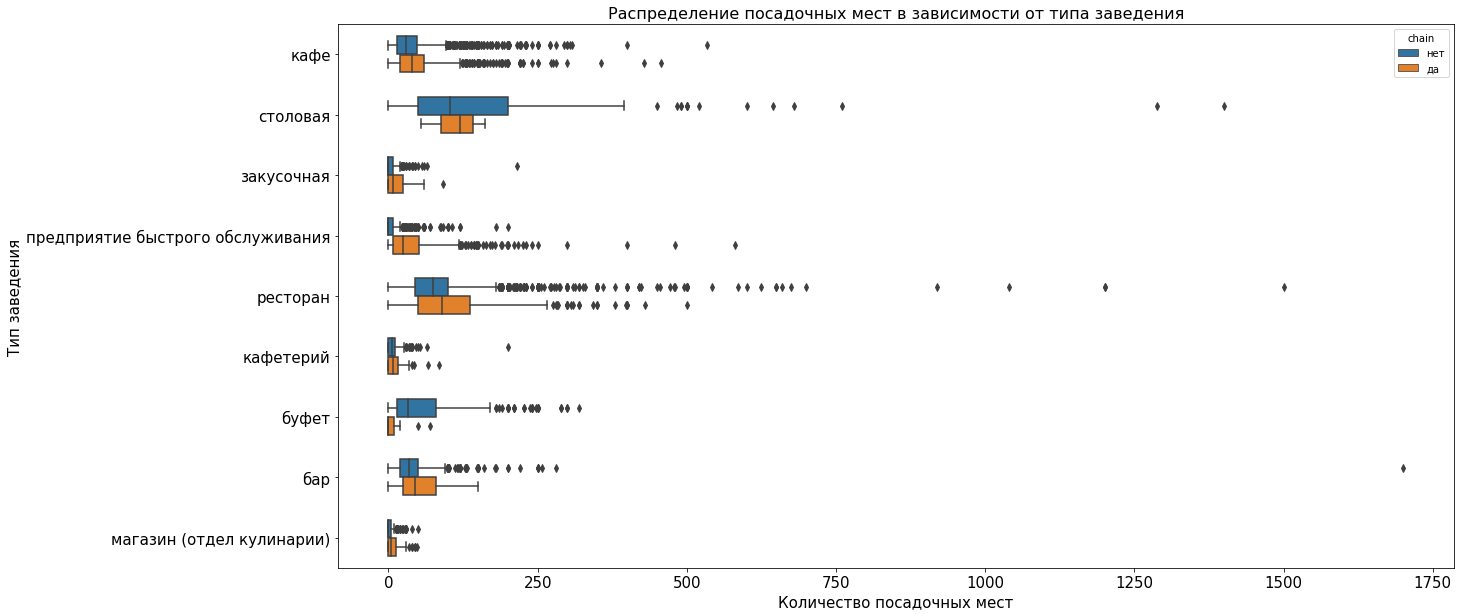

In [37]:
# Построим "ящик с усами" для распределения количества посадочных мест в зависимости от типа заведения
plt.figure(figsize=(20,10))
boxplot = sns.boxplot(x="number", y="object_type", data=data, width=.6, hue='chain')
boxplot.axes.set_title("Распределение посадочных мест в зависимости от типа заведения", fontsize=16)
boxplot.set_xlabel("Количество посадочных мест", fontsize=15)
boxplot.set_ylabel("Тип заведения", fontsize=15)
boxplot.tick_params(labelsize=15)
plt.show()

В данных присутствуют выбросы. Определим как среднее количество посадочных мест медианное значение. Построим сводную таблицу с медианными значениями посадочных мест.

In [38]:
pt_nb = data.pivot_table(index='object_type', values='number', aggfunc= 'median')
pt_nb.reset_index(drop=False, inplace=True)
pt_nb.sort_values(by='number', ascending = False)

,object_type,number
8,столовая,103
7,ресторан,80
0,бар,35
1,буфет,32
3,кафе,30
4,кафетерий,6
6,предприятие быстрого обслуживания,6
2,закусочная,0
5,магазин (отдел кулинарии),0


Вывод: самое большое количество посадочных мест ожидаемо - в столовых (в среднем 103 места).

Посмотрим среднее количество посадочных мест в зависимости от принадлежности заведения к сети:

In [39]:
pt_nbs = data.pivot_table(index='object_type', values='number', columns='chain',aggfunc= 'median')
pt_nbs.reset_index(drop=False, inplace=True)
pt_nbs.sort_values(by='да', ascending = False)

chain,object_type,да,нет
8,столовая,120.0,103.0
7,ресторан,89.0,75.0
0,бар,45.0,34.0
3,кафе,40.0,30.0
6,предприятие быстрого обслуживания,25.0,0.0
2,закусочная,8.0,0.0
4,кафетерий,8.0,6.0
5,магазин (отдел кулинарии),3.5,0.0
1,буфет,0.0,32.0


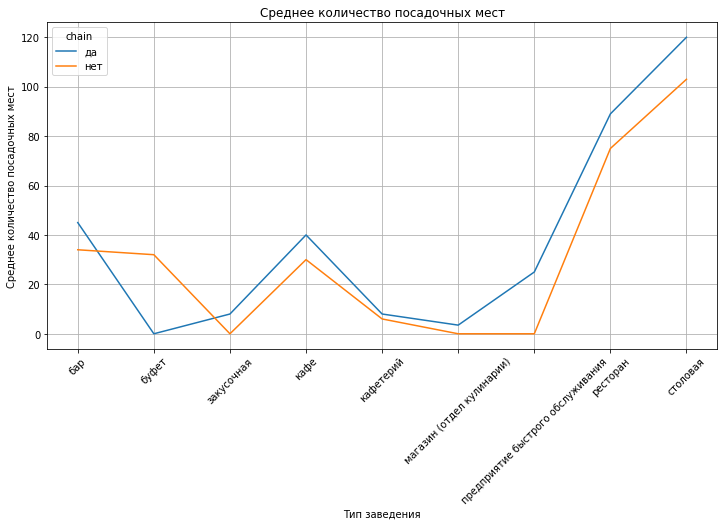

In [40]:
pt_nbs.plot(x='object_type',figsize=(12, 6));
plt.xticks(rotation=45)
plt.title('Среднее количество посадочных мест')
plt.xlabel('Тип заведения')
plt.ylabel('Среднее количество посадочных мест');
plt.grid();

Получается, что в сетевых заведениях среднее число посадочных мест выше, чем у несетевых заведений (за исключением буфетов, здесь у сетевых заведений среднее число посадочных мест значительно меньше, чем у несетевых заведений)

Посмотрим количества сетевых заведений в зависимости от числа посадочных мест:

Посмотрим по какому типу организованы сетевые кафе. Так как количество посадочных мест зависит от типа заведения, то, в данном анализе будем рассматривать только кафе.

Построим сводную таблицу для подсчета количества заведений и среднего количества посадочных мест в них (таблица построена на данных без исправления неявных дубликатов. Будем считать, что количество неявных дубликатов несильно исказит картину для оценки количества посадочных мест и количества заведений)

In [41]:
cafe_data = data.query('chain=="да"& object_type=="кафе"'
          ).pivot_table(index="object_name", values='number',aggfunc=['count','median'])
cafe_data.reset_index(drop=False, inplace=True)
cafe_data.columns = list(map("_".join, cafe_data.columns))
cafe_data = cafe_data.sort_values(by = 'count_number', ascending = False)
cafe_data['nb_places'] = cafe_data['count_number']*cafe_data['median_number']#усредненное число посадочных мест во всех заведениях
# Добавим фильтр для исключения неявных дубликатов (в сети более 1 заведения)
# количество посадочных мест больше 0
# Общее (усредненное)количество посаодчныщх мест во всех заведениях больше 40 
cafe_data = cafe_data.query('count_number>2 & median_number>0 & nb_places>100') 
cafe_data.head(10)                 

,object_name_,count_number,median_number,nb_places
415,Шоколадница,134,50.0,6700.0
117,Домино'с Пицца,50,15.5,775.0
398,Хинкальная,32,45.0,1440.0
370,Суши Wok,29,8.0,232.0
223,Кофе Хаус,28,50.0,1400.0
18,KFC,26,35.0,910.0
384,Теремок,23,20.0,460.0
302,Папа Джонс,23,25.0,575.0
35,Starbucks,23,40.0,920.0
246,Крошка Картошка,22,13.5,297.0


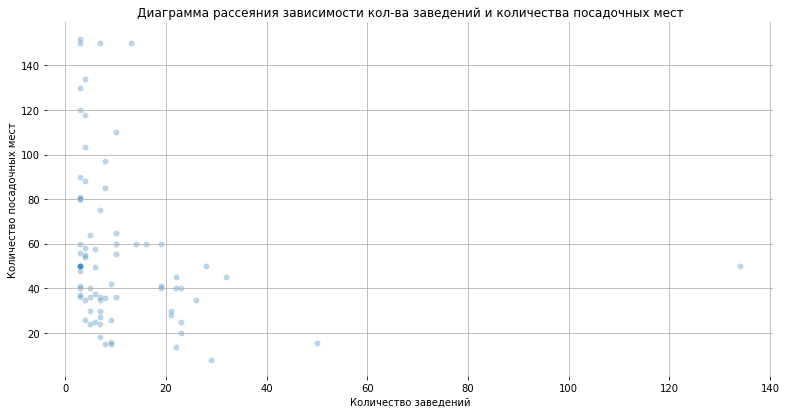

In [42]:
#Посмотрим диаграмму рассеяния зависимости кол-ва заведений и количества посадочных мест
f, ax = plt.subplots(figsize=(6.5*2, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="count_number", y="median_number", data=cafe_data, ax=ax, alpha=0.3)
plt.title('Диаграмма рассеяния зависимости кол-ва заведений и количества посадочных мест')
plt.xlabel('Количество заведений')
plt.ylabel('Количество посадочных мест');
plt.grid();

Из графика можно сделать вывод, что сетевые кафе строятся принципу - или много кафе (больше 20) с малым количеством посадочных мест (до 60) или по принципу - мало кафе (меньше 20) с большим количеством мест (больше 60).

#### Исследование расположения объектов общественного питания

Посмотрим на каких улицах расположено больше всего объектов общественного питания в Москве.

In [43]:
# Определение 10 самых популярных улиц в Москве
pv_street_pop = data.query('city=="город Москва"').pivot_table(index='street', values='id', aggfunc='count')
pv_street_pop.reset_index(drop=False, inplace=True)
pv_street_pop10 = pv_street_pop.sort_values(by='id', ascending = False).head(10)
pv_street_pop10

,street,id
1383,проспект Мира,204
996,Профсоюзная улица,182
683,Ленинградский проспект,172
981,Пресненская набережная,167
406,Варшавское шоссе,162
686,Ленинский проспект,148
1380,проспект Вернадского,128
674,Кутузовский проспект,114
600,Каширское шоссе,111
605,Кировоградская улица,108


Определим в каких районах находятся улицы с наибольшим количеством объектов общественного питания. Добавим в таблицу pv_street_pop10 названия округов и районов Москвы для выбранных улиц

In [44]:
# Переименум колонку streetname в таблице df_ms на street
df_ms = df_ms.rename(columns={"streetname": "street"})

In [45]:
pv_street_pop10_pls = pv_street_pop10.merge(df_ms, on='street', how='left')
pv_street_pop10_pls

,street,id,areaid,okrug,area
0,проспект Мира,204,70.0,СВАО,Алексеевский район
1,проспект Мира,204,86.0,СВАО,Ярославский Район
2,проспект Мира,204,78.0,СВАО,Район Марьина роща
3,проспект Мира,204,79.0,СВАО,Останкинский район
4,проспект Мира,204,81.0,СВАО,Район Ростокино
5,проспект Мира,204,82.0,СВАО,Район Свиблово
6,проспект Мира,204,16.0,ЦАО,Мещанский район
7,Профсоюзная улица,182,123.0,ЮЗАО,Академический район
8,Профсоюзная улица,182,132.0,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,134.0,ЮЗАО,Район Ясенево


Видно, что каждая выбранная улица проходят через большое количество районов Москвы. Посмотрим на список округов, через которые проходят выбранные улицы

In [46]:
pv_street_pop10_pls.okrug.unique()

array(['СВАО', 'ЦАО', 'ЮЗАО', 'САО', 'ЮАО', 'ЗАО'], dtype=object)

Создадим отдельную таблицу, в которой присутствуют все объекты, расположенные на 10 популярных улицах:

In [47]:
# Таблица с данными только для популярных улиц
data_str_pop = data[data['street'].isin(pv_street_pop10['street'])]

In [48]:
data_str_pop.head(5)

,id,object_name,chain,object_type,address,number,city,street
151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,город Москва,Варшавское шоссе
152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,город Москва,Варшавское шоссе
153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,город Москва,Варшавское шоссе
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,город Москва,Варшавское шоссе
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,город Москва,Варшавское шоссе


Проверим через какие населенные пункты проходят эти улицы: 

In [49]:
data_str_pop.city.unique()

array(['город Москва', 'поселение Воскресенское', 'город Щербинка'],
      dtype=object)

In [50]:
# посмотрим какая улица проходит через п.Воскресенсое и г. Щербинка
data_str_pop.query('city=="поселение Воскресенское"|city=="город Щербинка"')

,id,object_name,chain,object_type,address,number,city,street
8505,150564,Кафе,нет,кафе,"город Москва, поселение Воскресенское, Варшавс...",16,поселение Воскресенское,Варшавское шоссе
8591,147763,Чайхона,нет,кафе,"город Москва, город Щербинка, Варшавское шоссе...",65,город Щербинка,Варшавское шоссе
8598,149854,Моцарт,нет,кафе,"город Москва, город Щербинка, Варшавское шоссе...",12,город Щербинка,Варшавское шоссе


Оставим в таблице только адреса для Москвы

In [51]:
data_str_pop = data_str_pop.query('city=="город Москва"')

Выпишем адреса всех объектов из таблицы data_str_pop в отдельный файл. И отобразим эти адреса на карте

In [52]:
# удалим дубликаты в колонке address
data_str_pop0 =data_str_pop.drop_duplicates(subset=['address'])

In [53]:
data_str_pop0.city.unique()

array(['город Москва'], dtype=object)

In [54]:
data_str_pop0['address'].to_csv('list_adress_v2.csv',index=False)

Результат загрузки адресов представлен на картинке ниже (выполнено с помощью API Яндекс.Карт. Код для отрисовки меток на карте в данном проекте не представлен.

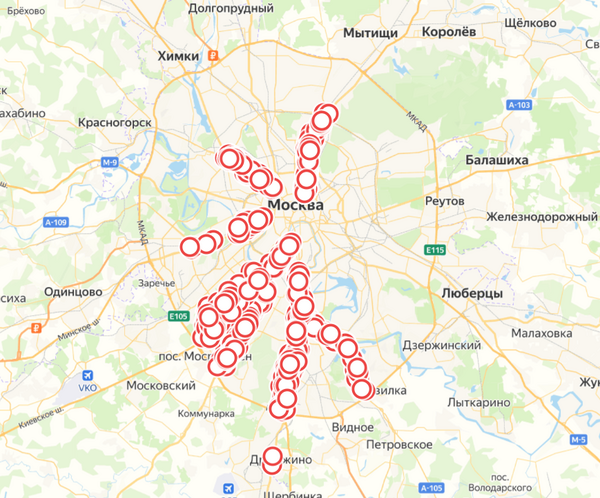

Все объекты расположенны вне Садового кольца: на северной, западной и южной стороне города (в следующих округах Москвы : СВАО, ЦАО, ЮЗАО, САО, ЮАО, ЗАО).

Посмотрим какие объекты расположены на популярных улицах (улицах, где много объектов общественного питания):

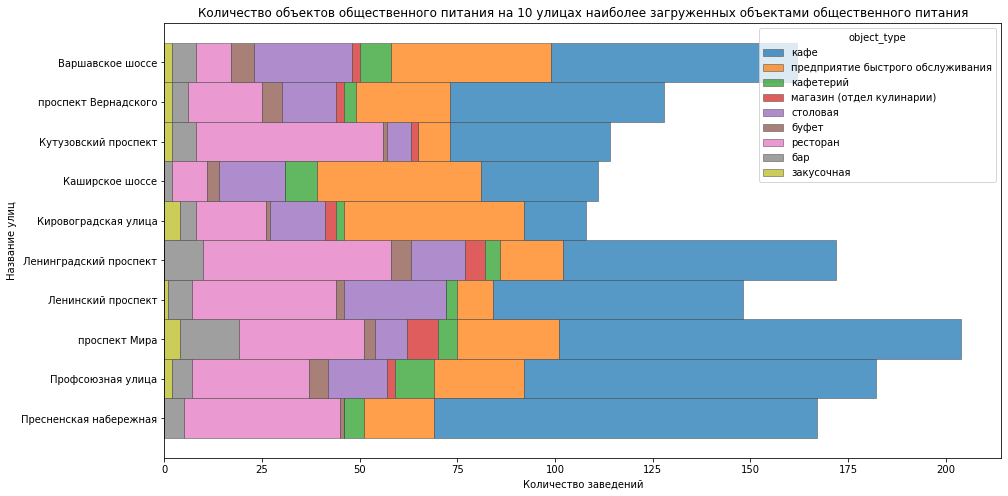

In [55]:
plt.figure(figsize=(15,8))
sns.histplot(
    data_str_pop,
    y="street", hue="object_type",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)
plt.title('Количество объектов общественного питания на 10 улицах наиболее загруженных объектами общественного питания')
plt.xlabel('Количество заведений')
plt.ylabel('Название улиц');

На улицах с наибольшим количеством объектов общественного питания (проспект Мира, Профсоюзная улица, Ленинградский проспект) наиболее распространены кафе и рестораны. На улицах с наименьшим количеством объектов общественного питания (из выбранных улиц) - наиболее распространены предприятия общественного питания.

Посмотрим какие заведения в целом наиболее распространены на улицах, загруженных объектами общественного питания и относятся ли они к сети заведений. Построим столбчатую диаграмму:

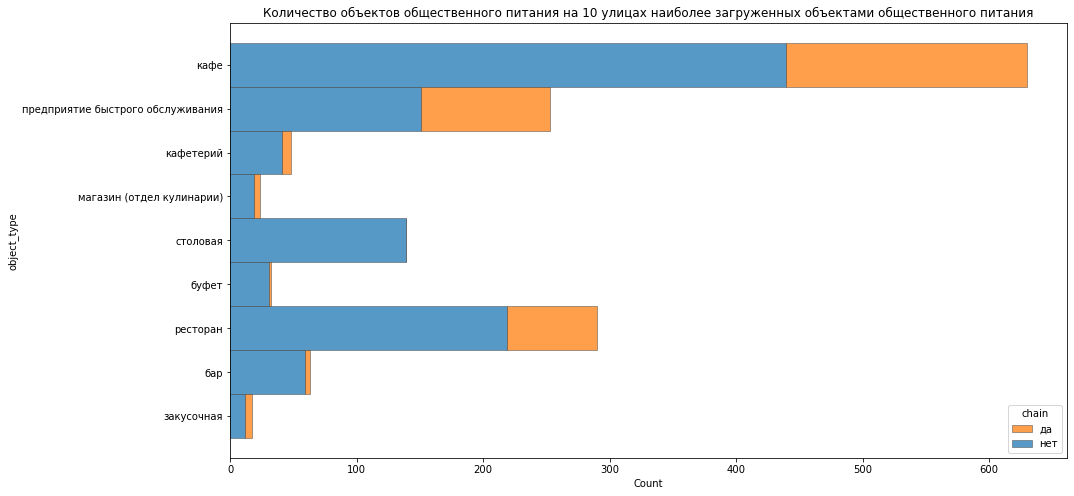

In [56]:
plt.figure(figsize=(15,8))
sns.histplot(
    data_str_pop,
    y="object_type",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    hue="chain",
    palette=palette
)
plt.title('Количество объектов общественного питания на 10 улицах наиболее загруженных объектами общественного питания');

На улицах, где расположено много объектов общественного питания наиболее распространены кафе. На втром месте по пулярносте здесь располжены рестораны. Среди этих объектов наиболее распространены несетевые заведения.

Посмотрим среденее количество посадочных мест в заведениях, расположенных на 10 наиболее загруженных улицах объектами общественного питания.

In [57]:
pt_nb_pop = data_str_pop.pivot_table(index='object_type', values='number', aggfunc= 'median')
pt_nb_pop.reset_index(drop=False, inplace=True)
pt_nb_pop.sort_values(by='number', ascending = False)

,object_type,number
8,столовая,96.0
7,ресторан,80.0
0,бар,40.0
3,кафе,32.0
1,буфет,22.0
6,предприятие быстрого обслуживания,8.0
4,кафетерий,6.5
2,закусочная,4.0
5,магазин (отдел кулинарии),4.0


Среднее количество посадочных мест на наиболее загруженных улицах не сильно отличается от среднего количества посадочных мет по Москве. 

Определим улицы Москвы, с небольшим количеством объектов общественного питания (один объект на улицу)

In [58]:
#Улицы с одним объектом 
pv_street_notpop = pv_street_pop.query('id==1')
pv_street_notpop

,street,id
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1
...,...,...
1816,улица Шеногина,1
1819,улица Шумилова,1
1820,улица Шумкина,1
1824,улица Щорса,1


Имеется 540 улица, на которых расположено не более одного объекта общественного питания. Покажем их на карте.

In [59]:
pv_street_notpop_pls = pv_street_notpop.merge(df_ms, on='street', how='left')
pv_street_notpop_pls

,street,id,areaid,okrug,area
0,1-й Балтийский переулок,1,54.0,САО,Район Аэропорт
1,1-й Басманный переулок,1,13.0,ЦАО,Басманный район
2,1-й Басманный переулок,1,15.0,ЦАО,Красносельский район
3,1-й Ботанический проезд,1,82.0,СВАО,Район Свиблово
4,1-й Вешняковский проезд,1,120.0,ЮВАО,Рязанский район
...,...,...,...,...,...
581,улица Шеногина,1,92.0,СЗАО,Район Хорошево-Мневники
582,улица Шумилова,1,113.0,ЮВАО,Район Кузьминки
583,улица Шумкина,1,26.0,ВАО,Район Сокольники
584,улица Щорса,1,46.0,ЗАО,Район Солнцево


Посмотрим на список из 10 районов Москвы, в котрых больше всего встречается улиц с одним объектов общественного питания 

In [60]:
pv_street_notpop_pls.pivot_table(index='area', values='street', aggfunc='count').sort_values(by = 'street', ascending = False).head(10)

,street
area,
Таганский район,28
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,20
Район Марьина роща,19
Район Арбат,18
Район Сокольники,15
Мещанский район,15


8 из 10 районов относятся к ЦАО

In [61]:
# Таблица с данными только для не популярных улиц
data_str_notpop = data[data['street'].isin(pv_street_notpop['street'])]
data_str_notpop.head(5)

,id,object_name,chain,object_type,address,number,city,street
19,153644,Американская Лаборатория Десертов,нет,кафе,"город Москва, Филипповский переулок, дом 15/5",20,город Москва,Филипповский переулок
61,21214,Столовая,нет,столовая,"город Москва, Бабаевская улица, дом 3",90,город Москва,Бабаевская улица
69,22139,ХуанХэ,нет,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,город Москва,1-й Балтийский переулок
81,25833,АЗЕРБАЙДЖАН,нет,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,город Москва,улица Демьяна Бедного
131,150881,ВГИК,нет,столовая,"город Москва, Будайская улица, дом 3",45,город Москва,Будайская улица


Оставим в таблице только адреса для Москвы

In [62]:
data_str_notpop = data_str_notpop.query('city=="город Москва"')

In [63]:
# удалим дубликаты в колонке address
data_str_notpop0 =data_str_notpop.drop_duplicates(subset=['address'])

In [64]:
data_str_notpop0['address'].to_csv('list_adress_notpop_v2.csv',index=False)

Результат загрузки адресов представлен на картинке ниже

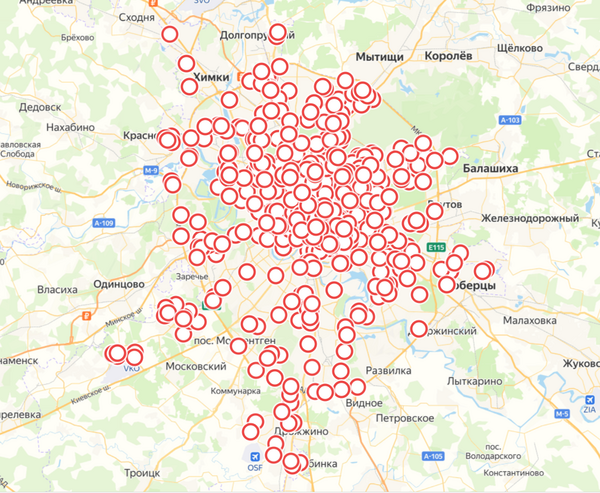

На карте видно большое скопление объектов в центре Москвы. Максимальное скопление объектов в Центральном Административном Округе.

Посмотрим какие заведения в целом наиболее распространены на улицах, где расположено не более одного объекта общественного питания и относятся ли они к сети заведений. Построим столбчатую диаграмму:

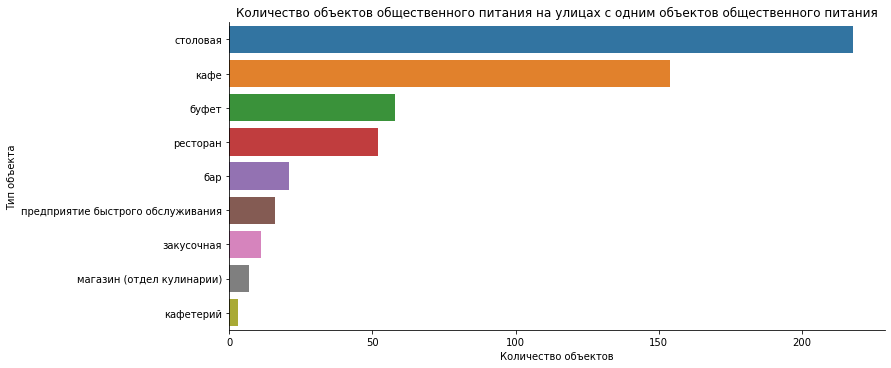

In [65]:
# Построекние столбчатой диаграммы
sns.catplot(y="object_type", kind="count", height=5, aspect=2.5, data=data_str_notpop0,
            palette="tab10",order=data_str_notpop0.object_type.value_counts().index).set(title='Количество объектов общественного питания на улицах с одним объектов общественного питания')
plt.xlabel('Количество объектов')
plt.ylabel('Тип объекта');

Чаще всего на улицах с одним объектом общественного питания встречается несетевая столовая или кафе.

Теперь отрисуем на карте все объекты типа кафе . Выберем предположительный район расположения нового кафе, где обслуживать гостей будут роботы и изучим уже существующие в этом районе объекты. Создадим таблицу с данными только для кафе, выпишем их адреса и отрисум на карте.

In [66]:
# создадим таблицу с данными только для кафе в Москве
data_cafe = data[(data['object_type'] == 'кафе')&(data['city'] == 'город Москва')]
data_cafe.head(3)

,id,object_name,chain,object_type,address,number,city,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,город Москва,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,город Москва,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,город Москва,Абельмановская улица


In [67]:
data_cafe['address'].to_csv('list_adress_cafe_v2.csv',index=False)

Выберем западный район Москвы (от центра до ТТК) как предположительный район расположение нового небольшого кафе. В этом районе не так много конкурирующих объектов как в северном районе и в этом районе есть современные объекты - например Москва Сити. Также в этом районе есть и другие достопримечательности, популярные среди туристов. Если местным жителям надоест кафе с роботами, то туристы будут постоянно посещать необычное кафе.

Предположительный район размещения кафе отмечен зеленым маркером на картинке ниже. Оценим уже имеющиеся объекты в этом районе на основе объектов, расположенных на улицах, отмеченых цифрами от 1 до 6:
* `1` - Комсомольский проспект
* `2` - Зубовский бульвар и Смоленский бульвар
* `3` - Гоголевский бульвар
* `4` - улица Арбат
* `5` - Кутузовский проспект
* `6` - улица Красная Пресня

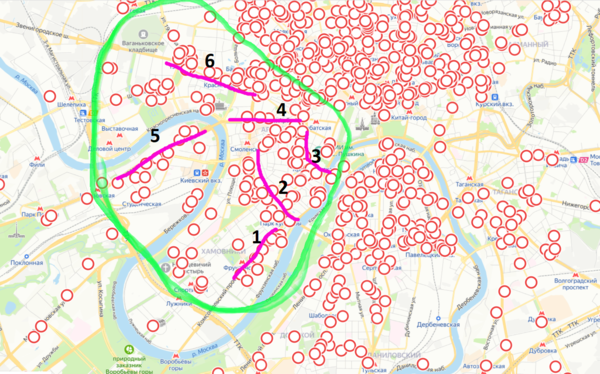

In [68]:
# Запишем названия улиц в лист
street_list_distr = ['Комсомольский проспект', 'Зубовский бульвар', 'Смоленский бульвар', 'Гоголевский бульвар',
                    'улица Арбат', 'Кутузовский проспект', 'улица Красная Пресня']

In [69]:
# Таблица с данными только для анализируемых улиц
data_str_cafe = data_cafe[data_cafe['street'].isin(street_list_distr)]
data_str_cafe.head(5)

,id,object_name,chain,object_type,address,number,city,street
37,24968,Му-Му,да,кафе,"город Москва, улица Арбат, дом 4, строение 1",125,город Москва,улица Арбат
38,127980,Хлеб насущный,да,кафе,"город Москва, улица Арбат, дом 6/2",20,город Москва,улица Арбат
40,107496,Калифорния Дайнер,нет,кафе,"город Москва, улица Арбат, дом 23, строение 1",150,город Москва,улица Арбат
41,110269,Балалаечная,нет,кафе,"город Москва, улица Арбат, дом 23, строение 1",49,город Москва,улица Арбат
42,74969,Пиросмани,нет,кафе,"город Москва, улица Арбат, дом 25/36",63,город Москва,улица Арбат


In [70]:
data_str_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 37 to 15177
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           135 non-null    int64 
 1   object_name  135 non-null    object
 2   chain        135 non-null    object
 3   object_type  135 non-null    object
 4   address      135 non-null    object
 5   number       135 non-null    int64 
 6   city         135 non-null    object
 7   street       135 non-null    object
dtypes: int64(2), object(6)
memory usage: 9.5+ KB


На выбранных улицах имеется 135 кафе. Посмотрим среднее количество посадочных мест в кафе на этих улицах.

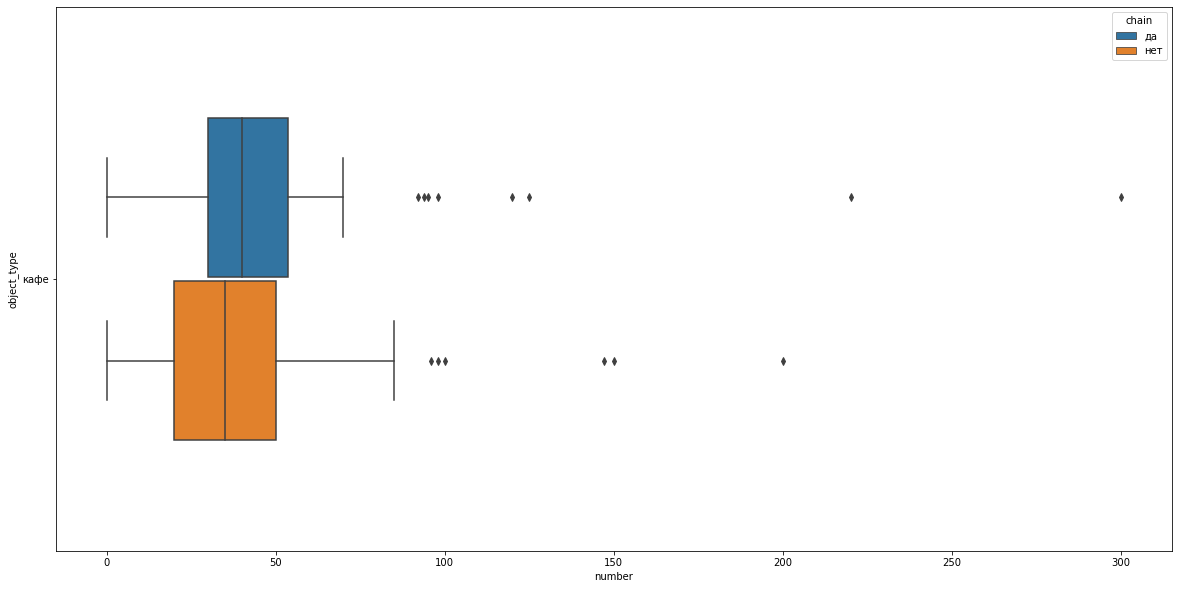

In [71]:
# Построим "ящик с усами" для распределения количества посадочных мест для кафе в выбранном районе
plt.figure(figsize=(20,10))
boxplot = sns.boxplot(x="number", y="object_type", data=data_str_cafe, width=.6, hue='chain')

In [72]:
# Описание данных в колонке number для кафе
data_str_cafe.query('object_type=="кафе"').number.describe()

count    135.000000
mean      44.985185
std       42.431505
min        0.000000
25%       20.000000
50%       40.000000
75%       50.000000
max      300.000000
Name: number, dtype: float64

Вывод: В данном проекте были проанализированы данные об объектах общественного питания в Москве с целью перспективности открытия нового кафе, где гостей будут обслуживать роботы. По предоставленным данным было определено, что в Москве уже имеется 15284 объекта общественного питания, расположенных на 2088 улицах. Среди этих объектов наиболее распространены кафе (4675 - несетевых кафе и  1396 - сетевых). Также было оценено среднее количество посадочных мест в объектах общественного питания. В среднем, в кафе около 30 посадочных мест, а в ресторанах - 80. Также были определены улицы с большим количеством объектов общ. питания. В основном это большие протяженные улицы. Определили, что в центре Москвы имеется много улиц, где расположено не более одного объекта общ. питания.

На основе проведенного анализа можно сделать предложение по открытию нового несетевого кафе на 20-25 мест в западном районе Москвы. Предположительное количество мест меньше чем среденее количество посадочных мест в конкурирующих кафе, т.к обслуживанием гостей будут заниматься дорогостоящие роботы и небольшое количество роботов не сможет обслужить большое количество гостей. 
Так как проект по открытию нового кафе является дорогостоящим, то предлагается на данном этапе открыть пока одино кафе (с планом в дальнейшем открыть сеть кафе), не в центрайльной части Москвы (из-за высокой стоимости аренды помещений). Район Москвы, в котором предлагается открыть новое кафе показан на картинке ниже.

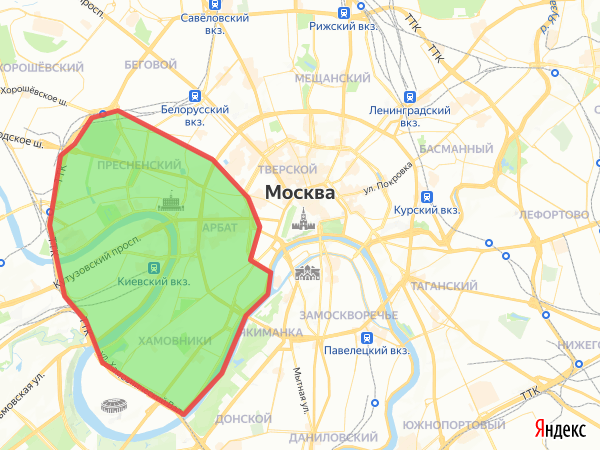